# Competição ML @SBS/DAA - Edição 2023/2024

In [55]:
#importing libraries
import pandas as pd
import seaborn as sns

## Importing datasets

In [56]:
# Importing datasets
folder = '/Users/giovannigiofre/Desktop/data and machine/group project/project 2/daasbstp2023/'

meteo_2023 = pd.read_csv(folder + 'meteo_202301-202304.csv')
meteo_2022 = pd.read_csv(folder + 'meteo_202201-202212.csv')
meteo_2021 = pd.read_csv(folder + 'meteo_202109-202112.csv')

In [57]:
# import chardet to encode energy datasets
import chardet

# Detect the encoding of the file
with open('/Users/giovannigiofre/Desktop/data and machine/group project/project 2/daasbstp2023/energia_202109-202112.csv', 'rb') as f:
    result = chardet.detect(f.read())

# Use the detected encoding
energia_2021 = pd.read_csv(folder + 'energia_202109-202112.csv', encoding=result['encoding'])
energia_2023 = pd.read_csv(folder + 'energia_202301-202304.csv', encoding=result['encoding'])
energia_2022 = pd.read_csv(folder + 'energia_202201-202212.csv', encoding=result['encoding'])

In [58]:
meteo_2023.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1672531200,2023-01-01 00:00:00 +0000 UTC,local,12.93,12.76,12.72,13.43,1019,NaN,NaN,95,2.02,3.72,100,moderate rain
1,1672534800,2023-01-01 01:00:00 +0000 UTC,local,13.49,13.38,13.43,13.90,1018,NaN,NaN,95,2.18,3.26,100,moderate rain
2,1672538400,2023-01-01 02:00:00 +0000 UTC,local,13.55,13.44,13.48,14.82,1017,NaN,NaN,95,2.88,2.44,100,moderate rain
3,1672542000,2023-01-01 03:00:00 +0000 UTC,local,13.61,13.51,12.01,14.82,1016,NaN,NaN,95,3.63,1.74,100,moderate rain
4,1672545600,2023-01-01 04:00:00 +0000 UTC,local,13.59,13.49,12.01,14.82,1015,NaN,NaN,95,4.58,1.13,100,moderate rain


In [59]:
energia_2023.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh)
0,2023-01-01,0,0.0,0.467,0.0
1,2023-01-01,1,0.0,0.577,0.0
2,2023-01-01,2,0.0,0.346,0.0
3,2023-01-01,3,0.0,0.270,0.0
4,2023-01-01,4,0.0,0.252,0.0


In [60]:
energia_2021['Injeção na rede (kWh)'].describe()

count      566
unique       4
top       High
freq       207
Name: Injeção na rede (kWh), dtype: object

In [61]:
meteo_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   1752 non-null   int64  
 1   dt_iso               1752 non-null   object 
 2   city_name            1752 non-null   object 
 3   temp                 1752 non-null   float64
 4   feels_like           1752 non-null   float64
 5   temp_min             1752 non-null   float64
 6   temp_max             1752 non-null   float64
 7   pressure             1752 non-null   int64  
 8   sea_level            0 non-null      float64
 9   grnd_level           0 non-null      float64
 10  humidity             1752 non-null   int64  
 11  wind_speed           1752 non-null   float64
 12  rain_1h              206 non-null    float64
 13  clouds_all           1752 non-null   int64  
 14  weather_description  1752 non-null   object 
dtypes: float64(8), int64(4), object(3)
mem

In [62]:
energia_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Hora                     2256 non-null   int64  
 2   Normal (kWh)             2256 non-null   float64
 3   Horário Económico (kWh)  2256 non-null   float64
 4   Autoconsumo (kWh)        2256 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 88.2+ KB


## Merge the datasets

Convert data information to merge

In [63]:
# meteo data
# remove last part of the string
meteo_2021['dt_iso'] = meteo_2021['dt_iso'].str[:-10]
meteo_2022['dt_iso'] = meteo_2022['dt_iso'].str[:-10]
meteo_2023['dt_iso'] = meteo_2023['dt_iso'].str[:-10]
meteo_2023['dt_iso'].head()

0    2023-01-01 00:00:00
1    2023-01-01 01:00:00
2    2023-01-01 02:00:00
3    2023-01-01 03:00:00
4    2023-01-01 04:00:00
Name: dt_iso, dtype: object

In [64]:
# conversion to date time data type
meteo_2021['DATE_TIME'] = pd.to_datetime(meteo_2021['dt_iso'], utc=True, format='%Y-%m-%d %H:%M:%S')
meteo_2022['DATE_TIME'] = pd.to_datetime(meteo_2022['dt_iso'], utc=True, format='%Y-%m-%d %H:%M:%S')
meteo_2023['DATE_TIME'] = pd.to_datetime(meteo_2023['dt_iso'], utc=True, format='%Y-%m-%d %H:%M:%S')
meteo_2021['DATE_TIME'].head()

0   2021-09-01 00:00:00+00:00
1   2021-09-01 01:00:00+00:00
2   2021-09-01 02:00:00+00:00
3   2021-09-01 03:00:00+00:00
4   2021-09-01 04:00:00+00:00
Name: DATE_TIME, dtype: datetime64[ns, UTC]

In [65]:
#drop the dt_iso columm
meteo_2021 = meteo_2021.drop(['dt_iso'], axis = 1)
meteo_2022 = meteo_2022.drop(['dt_iso'], axis = 1)
meteo_2023 = meteo_2023.drop(['dt_iso'], axis = 1)

In [66]:
# energy data
energia_2023['DATE_TIME'] = pd.to_datetime(energia_2023['Data'] + ' ' + energia_2023['Hora'].astype(str) + ':00:00', utc=True, format='%Y-%m-%d %H:%M:%S')
energia_2022['DATE_TIME'] = pd.to_datetime(energia_2022['Data'] + ' ' + energia_2022['Hora'].astype(str) + ':00:00', utc=True,format='%Y-%m-%d %H:%M:%S')
energia_2021['DATE_TIME'] = pd.to_datetime(energia_2021['Data'] + ' ' + energia_2021['Hora'].astype(str) + ':00:00', utc=True,format='%Y-%m-%d %H:%M:%S')

# Drop the original 'Data' and 'Hora' columns if needed
energia_2023 = energia_2023.drop(['Data', 'Hora'], axis=1)
energia_2022 = energia_2022.drop(['Data', 'Hora'], axis=1)
energia_2021 = energia_2021.drop(['Data', 'Hora'], axis=1)

In [67]:
energia_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   Normal (kWh)             2256 non-null   float64            
 1   Horário Económico (kWh)  2256 non-null   float64            
 2   Autoconsumo (kWh)        2256 non-null   float64            
 3   DATE_TIME                2256 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 70.6 KB


In [68]:
# merge the datasets

energy_train = pd.concat([energia_2022, energia_2021], ignore_index=True)
meteo_train = pd.concat([meteo_2022, meteo_2021], ignore_index=True)
energy_test = energia_2023
meteo_test = meteo_2023

In [69]:
energy_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   Normal (kWh)             11016 non-null  float64            
 1   Horário Económico (kWh)  11016 non-null  float64            
 2   Autoconsumo (kWh)        11016 non-null  float64            
 3   Injeção na rede (kWh)    3239 non-null   object             
 4   DATE_TIME                11016 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(3), object(1)
memory usage: 430.4+ KB


In [70]:
meteo_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11688 entries, 0 to 11687
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   dt                   11688 non-null  int64              
 1   city_name            11688 non-null  object             
 2   temp                 11688 non-null  float64            
 3   feels_like           11688 non-null  float64            
 4   temp_min             11688 non-null  float64            
 5   temp_max             11688 non-null  float64            
 6   pressure             11688 non-null  int64              
 7   sea_level            0 non-null      float64            
 8   grnd_level           0 non-null      float64            
 9   humidity             11688 non-null  int64              
 10  wind_speed           11688 non-null  float64            
 11  rain_1h              2435 non-null   float64            
 12  clouds_all        

In [71]:
energy_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   Normal (kWh)             2256 non-null   float64            
 1   Horário Económico (kWh)  2256 non-null   float64            
 2   Autoconsumo (kWh)        2256 non-null   float64            
 3   DATE_TIME                2256 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 70.6 KB


In [72]:
meteo_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   dt                   1752 non-null   int64              
 1   city_name            1752 non-null   object             
 2   temp                 1752 non-null   float64            
 3   feels_like           1752 non-null   float64            
 4   temp_min             1752 non-null   float64            
 5   temp_max             1752 non-null   float64            
 6   pressure             1752 non-null   int64              
 7   sea_level            0 non-null      float64            
 8   grnd_level           0 non-null      float64            
 9   humidity             1752 non-null   int64              
 10  wind_speed           1752 non-null   float64            
 11  rain_1h              206 non-null    float64            
 12  clouds_all          

In [73]:
train = energy_train.merge(meteo_train, on='DATE_TIME', how='inner')
test = energy_test.merge(meteo_test, on='DATE_TIME', how='left')

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   Normal (kWh)             11016 non-null  float64            
 1   Horário Económico (kWh)  11016 non-null  float64            
 2   Autoconsumo (kWh)        11016 non-null  float64            
 3   Injeção na rede (kWh)    3239 non-null   object             
 4   DATE_TIME                11016 non-null  datetime64[ns, UTC]
 5   dt                       11016 non-null  int64              
 6   city_name                11016 non-null  object             
 7   temp                     11016 non-null  float64            
 8   feels_like               11016 non-null  float64            
 9   temp_min                 11016 non-null  float64            
 10  temp_max                 11016 non-null  float64            
 11  pressure                 110

In [75]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   Normal (kWh)             2256 non-null   float64            
 1   Horário Económico (kWh)  2256 non-null   float64            
 2   Autoconsumo (kWh)        2256 non-null   float64            
 3   DATE_TIME                2256 non-null   datetime64[ns, UTC]
 4   dt                       1752 non-null   float64            
 5   city_name                1752 non-null   object             
 6   temp                     1752 non-null   float64            
 7   feels_like               1752 non-null   float64            
 8   temp_min                 1752 non-null   float64            
 9   temp_max                 1752 non-null   float64            
 10  pressure                 1752 non-null   float64            
 11  sea_level                0 non

we can drop all the useless features, like sea_level and grnd_level cause they haven't values

In [76]:
train = train.drop(['sea_level','grnd_level'], axis = 1)
test = test.drop(['sea_level','grnd_level'], axis = 1)

In [77]:
train.head()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),DATE_TIME,dt,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,0.0,0.486,0.0,NaN,2022-01-01 00:00:00+00:00,1640995200,local,16.59,16.00,16.21,16.72,1024,65,3.15,NaN,97,overcast clouds
1,0.0,0.429,0.0,NaN,2022-01-01 01:00:00+00:00,1640998800,local,16.59,16.00,16.21,16.72,1024,65,3.14,NaN,58,broken clouds
2,0.0,0.463,0.0,NaN,2022-01-01 02:00:00+00:00,1641002400,local,16.59,16.03,15.67,16.72,1024,66,3.12,NaN,23,few clouds
3,0.0,0.545,0.0,NaN,2022-01-01 03:00:00+00:00,1641006000,local,13.59,12.75,11.61,16.16,1023,67,3.08,NaN,22,few clouds
4,0.0,0.439,0.0,NaN,2022-01-01 04:00:00+00:00,1641009600,local,14.97,14.27,14.72,15.66,1023,67,3.12,NaN,15,few clouds


In [78]:
train['city_name'].unique()

array(['local'], dtype=object)

we can drop city_name too as is a feature with just one value and dt as useless for our analysis

In [79]:
train = train.drop(['city_name', 'dt'], axis = 1)
test = test.drop(['city_name', 'dt'], axis = 1)

In [80]:
train.head()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),DATE_TIME,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,0.0,0.486,0.0,NaN,2022-01-01 00:00:00+00:00,16.59,16.00,16.21,16.72,1024,65,3.15,NaN,97,overcast clouds
1,0.0,0.429,0.0,NaN,2022-01-01 01:00:00+00:00,16.59,16.00,16.21,16.72,1024,65,3.14,NaN,58,broken clouds
2,0.0,0.463,0.0,NaN,2022-01-01 02:00:00+00:00,16.59,16.03,15.67,16.72,1024,66,3.12,NaN,23,few clouds
3,0.0,0.545,0.0,NaN,2022-01-01 03:00:00+00:00,13.59,12.75,11.61,16.16,1023,67,3.08,NaN,22,few clouds
4,0.0,0.439,0.0,NaN,2022-01-01 04:00:00+00:00,14.97,14.27,14.72,15.66,1023,67,3.12,NaN,15,few clouds


In [81]:
# fix the NaN values in the target variable
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

In [82]:
train['Injeção na rede (kWh)'].value_counts()

Injeção na rede (kWh)
0            7777
High         1103
Medium       1098
Very High     606
Low           432
Name: count, dtype: int64

The dataset is unbalanced, we have way more None values, probably due to the night time moment where the solar plants doesn't work

In [83]:
train['Injeção na rede (kWh)'].astype('category')

0        0
1        0
2        0
3        0
4        0
        ..
11011    0
11012    0
11013    0
11014    0
11015    0
Name: Injeção na rede (kWh), Length: 11016, dtype: category
Categories (5, object): [0, 'High', 'Low', 'Medium', 'Very High']

In [84]:
# fix the dependent variable

ordinal_mapping = {0 : 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}
train['Injeção na rede (kWh)'] = pd.to_numeric(train['Injeção na rede (kWh)'].map(ordinal_mapping))

In [85]:
train['Injeção na rede (kWh)'].unique()

array([0, 2, 1, 3, 4])

## Data exploration and feature engineering

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/giovannigiofre/opt/anaconda3/envs/dados/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/giovannigiofre/opt/anaconda3/envs/dados/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/giovannigiofre/opt/anaconda3/envs/dados/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


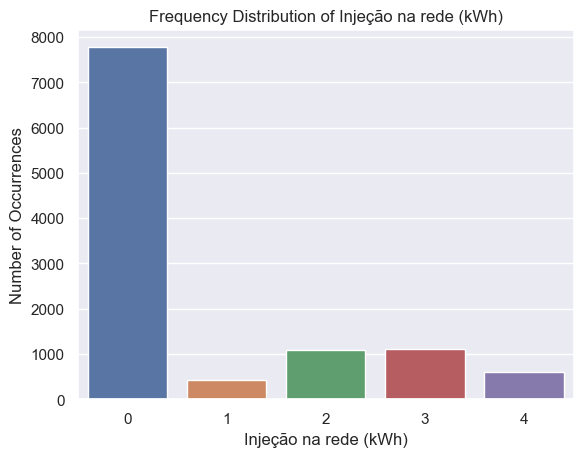

In [87]:
counts = train['Injeção na rede (kWh)'].value_counts()
sns.set(style='darkgrid')
sns.barplot(x = counts.index, y = counts.values)
plt.title('Frequency Distribution of Injeção na rede (kWh)')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Injeção na rede (kWh)', fontsize = 12)
plt.show()

<Axes: >

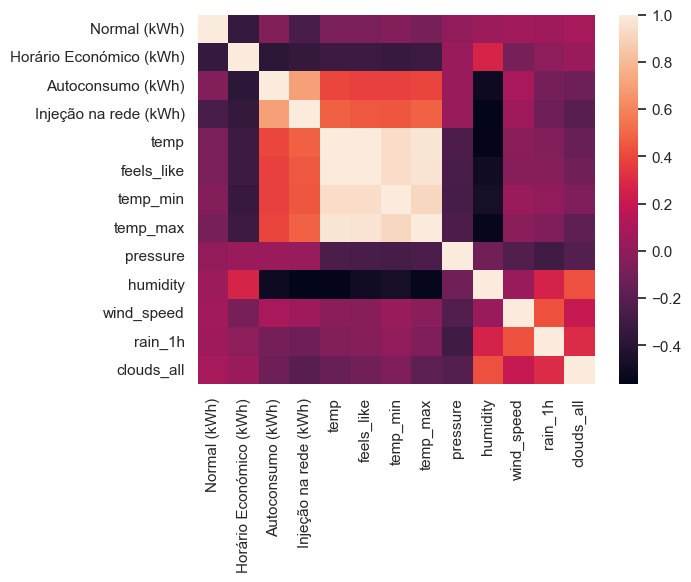

In [88]:
sns.heatmap(train.corr(numeric_only=True))

our dependent variable as an important correlation with humidity

In [89]:
train['Injeção na rede (kWh)'].value_counts()

Injeção na rede (kWh)
0    7777
3    1103
2    1098
4     606
1     432
Name: count, dtype: int64

In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   Normal (kWh)             11016 non-null  float64            
 1   Horário Económico (kWh)  11016 non-null  float64            
 2   Autoconsumo (kWh)        11016 non-null  float64            
 3   Injeção na rede (kWh)    11016 non-null  int64              
 4   DATE_TIME                11016 non-null  datetime64[ns, UTC]
 5   temp                     11016 non-null  float64            
 6   feels_like               11016 non-null  float64            
 7   temp_min                 11016 non-null  float64            
 8   temp_max                 11016 non-null  float64            
 9   pressure                 11016 non-null  int64              
 10  humidity                 11016 non-null  int64              
 11  wind_speed               110

In [91]:
train['rain_1h'] = train['rain_1h'].astype('float')
test['rain_1h'] = test['rain_1h'].astype('float')

In [92]:
train['rain_1h'].describe()

count    11016.000000
mean         0.185905
std          0.611241
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.450000
Name: rain_1h, dtype: float64

In [93]:
train['weather_description'].value_counts()

weather_description
sky is clear            3010
overcast clouds         2430
light rain              1662
broken clouds           1413
scattered clouds        1148
few clouds               731
moderate rain            562
heavy intensity rain      60
Name: count, dtype: int64

In [94]:
train = pd.get_dummies(train, columns=['weather_description'], prefix='weather')
test = pd.get_dummies(test, columns=['weather_description'], prefix='weather')

In [95]:
train.head()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),DATE_TIME,temp,feels_like,temp_min,temp_max,pressure,...,rain_1h,clouds_all,weather_broken clouds,weather_few clouds,weather_heavy intensity rain,weather_light rain,weather_moderate rain,weather_overcast clouds,weather_scattered clouds,weather_sky is clear
0,0.0,0.486,0.0,0,2022-01-01 00:00:00+00:00,16.59,16.00,16.21,16.72,1024,...,0.0,97,False,False,False,False,False,True,False,False
1,0.0,0.429,0.0,0,2022-01-01 01:00:00+00:00,16.59,16.00,16.21,16.72,1024,...,0.0,58,True,False,False,False,False,False,False,False
2,0.0,0.463,0.0,0,2022-01-01 02:00:00+00:00,16.59,16.03,15.67,16.72,1024,...,0.0,23,False,True,False,False,False,False,False,False
3,0.0,0.545,0.0,0,2022-01-01 03:00:00+00:00,13.59,12.75,11.61,16.16,1023,...,0.0,22,False,True,False,False,False,False,False,False
4,0.0,0.439,0.0,0,2022-01-01 04:00:00+00:00,14.97,14.27,14.72,15.66,1023,...,0.0,15,False,True,False,False,False,False,False,False


In [96]:
test.head()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),DATE_TIME,temp,feels_like,temp_min,temp_max,pressure,humidity,...,clouds_all,weather_0,weather_broken clouds,weather_few clouds,weather_heavy intensity rain,weather_light rain,weather_moderate rain,weather_overcast clouds,weather_scattered clouds,weather_sky is clear
0,0.0,0.467,0.0,2023-01-01 00:00:00+00:00,12.93,12.76,12.72,13.43,1019.0,95.0,...,100.0,False,False,False,False,False,True,False,False,False
1,0.0,0.577,0.0,2023-01-01 01:00:00+00:00,13.49,13.38,13.43,13.90,1018.0,95.0,...,100.0,False,False,False,False,False,True,False,False,False
2,0.0,0.346,0.0,2023-01-01 02:00:00+00:00,13.55,13.44,13.48,14.82,1017.0,95.0,...,100.0,False,False,False,False,False,True,False,False,False
3,0.0,0.270,0.0,2023-01-01 03:00:00+00:00,13.61,13.51,12.01,14.82,1016.0,95.0,...,100.0,False,False,False,False,False,True,False,False,False
4,0.0,0.252,0.0,2023-01-01 04:00:00+00:00,13.59,13.49,12.01,14.82,1015.0,95.0,...,100.0,False,False,False,False,False,True,False,False,False


In [97]:
test = test.drop('weather_0', axis=1)

In [98]:
train['pressure'].describe()

count    11016.000000
mean      1018.396605
std          6.203379
min        994.000000
25%       1015.000000
50%       1018.000000
75%       1022.000000
max       1034.000000
Name: pressure, dtype: float64

Is important to tak into account the moment of the day for the prediction, that can help us to easily predict when the dependent variable has 'None' as result, so we can create a feature that tell us the moment of the day

In [99]:
train['hour'] = train['DATE_TIME'].dt.hour
test['hour'] = test['DATE_TIME'].dt.hour

/Users/giovannigiofre/opt/anaconda3/envs/dados/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/giovannigiofre/opt/anaconda3/envs/dados/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/giovannigiofre/opt/anaconda3/envs/dados/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/giovannigiofre/opt/anaconda3/envs/dados/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

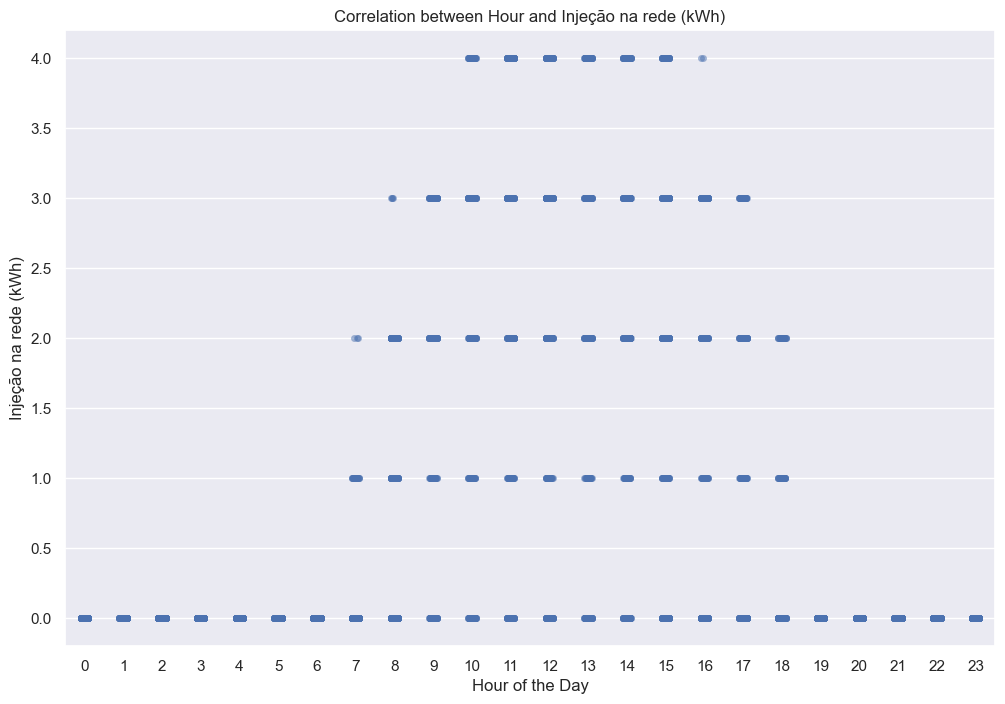

In [100]:
plt.figure(figsize=(12, 8))
sns.stripplot(x='hour', y='Injeção na rede (kWh)', data=train, jitter=True, alpha=0.5)
plt.title('Correlation between Hour and Injeção na rede (kWh)')
plt.xlabel('Hour of the Day')
plt.ylabel('Injeção na rede (kWh)')
plt.show()

The plot highlights that between 19 and 6 there are just None values for our dependent variable, so we can create a variable that separate light moments to dark moments during the day

In [101]:
# Extract the hour from the datetime
train['light_time'] = (train['hour'] >= 6) & (train['hour'] <= 19)
test['light_time'] = (test['hour'] >= 6) & (test['hour'] <= 19)


We decided to keep the hour features, beacuse the model perform better with it, probably cause help the model to predict the dependent variable when it isn't None

In [102]:
# drop the features
train = train.drop('DATE_TIME', axis=1)
test = test.drop('DATE_TIME', axis=1)

In [103]:
# Separate features (X) and target variable (y)
X = train.drop('Injeção na rede (kWh)', axis=1)
y = train['Injeção na rede (kWh)']

## Machine Learning Models

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [105]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 12)

#### Random Forest

In [113]:
# Define the Random Forest model
rf_model = RandomForestClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],  # Extend the maximum depth
    'min_samples_split': [2, 5, 10, 15],  # Add larger values for min_samples_split
    'min_samples_leaf': [1, 2, 4, 8]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='accuracy',verbose=2, n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 512 candidates, totalling 1536 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.5s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.5s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.7s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.5s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   2.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total t

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=2)

In [114]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [115]:
# Make predictions on the test set
y_pred = grid_search.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.8634301270417423
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1502
           1       0.46      0.12      0.20        96
           2       0.61      0.63      0.62       235
           3       0.64      0.77      0.70       241
           4       0.80      0.61      0.69       130

    accuracy                           0.86      2204
   macro avg       0.69      0.62      0.64      2204
weighted avg       0.85      0.86      0.85      2204



In [116]:
prediction_test = grid_search.predict(test)

In [117]:
# Create the submission DataFrame
label_mapping = {0: 'None', 1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}

# Create the submission DataFrame
submission = pd.DataFrame({
    'RowId': range(1, 2257), 
    'Result': prediction_test
})

# Map numeric values to labels using the dictionary
submission['Result'] = submission['Result'].map(label_mapping)
submission

,RowId,Result
0,1,None
1,2,None
2,3,None
3,4,None
4,5,None
...,...,...
2251,2252,None
2252,2253,None
2253,2254,None
2254,2255,None


In [118]:
submission.to_csv("submission_RF.csv", index=False)

#### XGBClassifier

In [119]:
xgb_model = XGBClassifier(objective='multi:softmax', enable_categorical=True, random_state=42)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 60, 100],
    'learning_rate': [0.01, 0.1, 1],
    'booster': ['gbtree', 'dart'],
    'max_depth': [None, 7, 10],
    'subsample': [0.8, 0.9, 1]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=2)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[CV] END booster=gbtree, learning_rate=0.01, max_depth=None, n_estimators=50, subsample=0.8; total time=   2.3s
[CV] END booster=gbtree, learning_rate=0.01, max_depth=None, n_estimators=50, subsample=0.8; total time=   2.1s
[CV] END booster=gbtree, learning_rate=0.01, max_depth=None, n_estimators=50, subsample=0.8; total time=   1.7s
[CV] END booster=gbtree, learning_rate=0.01, max_depth=None, n_estimators=50, subsample=0.9; total time=   1.4s
[CV] END booster=gbtree, learning_rate=0.01, max_depth=None, n_estimators=50, subsample=0.9; total time=   1.4s
[CV] END booster=gbtree, learning_rate=0.01, max_depth=None, n_estimators=50, subsample=0.9; total time=   1.5s
[CV] END booster=gbtree, learning_rate=0.01, max_depth=None, n_estimators=50, subsample=1; total time=   1.4s
[CV] END booster=gbtree, learning_rate=0.01, max_depth=None, n_estimators=50, subsample=1; total time=   1.4s
[CV] END booster=gbtree, learning_rate=0.01, max_depth=None, n_estimators=50, subsample=1; total time=   1.4

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softmax', ...),
             param_grid={'booster': ['gbtree', 'dart'],
                         'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [None, 7, 10],
                         'n_estimators': [50, 60, 100],
                         'subsample': [0.8, 0.9, 1]},
             scoring='accuracy', verbose=2)

In [120]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'booster': 'dart', 'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 100, 'subsample': 0.9}


In [121]:
# Make predictions on the test set
y_pred = grid_search.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.8666061705989111
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1502
           1       0.40      0.23      0.29        96
           2       0.63      0.63      0.63       235
           3       0.67      0.76      0.71       241
           4       0.78      0.69      0.73       130

    accuracy                           0.87      2204
   macro avg       0.69      0.66      0.67      2204
weighted avg       0.86      0.87      0.86      2204



In [122]:
prediction_test = grid_search.predict(test)

In [123]:
# Create the submission DataFrame
label_mapping = {0: 'None', 1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}

# Create the submission DataFrame
submission = pd.DataFrame({
    'RowId': range(1, 2257), 
    'Result': prediction_test
})

# Map numeric values to labels using the dictionary
submission['Result'] = submission['Result'].map(label_mapping)
submission

,RowId,Result
0,1,None
1,2,None
2,3,None
3,4,None
4,5,None
...,...,...
2251,2252,None
2252,2253,None
2253,2254,None
2254,2255,None


In [124]:
submission.to_csv("submission_XGBOOST.csv", index=False)